# Phase2_Supervised_Learning

**Course:** SWE 485  
**Notebook:** Phase2_Supervised_Learning.ipynb

## Dataset Goal & Source
- **Goal:** Analyze relationships between job titles and required skills for recommendation.
- **Source:** https://www.kaggle.com/datasets/batuhanmutlu/job-skill-set?resource=download

In [10]:
%pip install -q pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\lamaa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
# Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# For building the pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# For the models (Algorithms)
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# For evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns # For plotting the confusion matrix

In [12]:
# Load Dataset

DATA_PATH = "jobs_dataset_raw.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"Loaded: {DATA_PATH}")
except FileNotFoundError as e:
    raise FileNotFoundError(f"File not found: '{DATA_PATH}'. Please verify the name and folder.") from e

Loaded: jobs_dataset_raw.csv


In [13]:
# 2. Data Cleaning and Preparation

# Clean the skills column from brackets and quotes
# e.g., "'Python', 'SQL'" ---> "Python SQL"
df['job_skill_set_cleaned'] = df['job_skill_set'].str.strip("[]'").str.replace("', '", " ", regex=False)

# Combine all text columns into one feature for the model to process(the main feature, X)
# Using .fillna('') to avoid errors with missing text
df['all_text'] = df['job_title'].fillna('') + ' ' + \
                 df['job_description'].fillna('') + ' ' + \
                 df['job_skill_set_cleaned'].fillna('')

print("Combined text feature created successfully.")
df[['category', 'all_text']].head()

Combined text feature created successfully.


,category,all_text
0,HR,Sr Human Resource Generalist SUMMARY\r\nTHE SR...
1,HR,Human Resources Manager BE PART OF A STELLAR T...
2,HR,Director of Human Resources OUR CLIENT IS A TH...
3,HR,Chief Human Resources Officer JOB TITLE: CHIEF...
4,HR,Human Resources Generalist (Hybrid Role) DESCR...


In [14]:
# 3. Feature and Target Definition

# X = input text data (features) (the text the model will read)
X = df['all_text']

# y = output category (target) (the answer we want the model to predict)
y = df['category']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (1167,)
Target (y) shape: (1167,)


In [15]:
# 4. Train-Test Split

# Split data: 80% training, 20% testing
# stratify=y keeps the same category proportions in both splits

# random_state=1 ensures we get the same split every time we run the code
# stratify=y is a crucial step. Since our data is well-balanced (as discovered in Phase 1),
# this ensures that the proportion of categories (IT, HR, Sales...) in the training set
# is the same as in the test set. This makes our evaluation very accurate.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 933 rows
Test set size: 234 rows


## 5. Algorithm Selection & Justification
We selected two supervised learning algorithms for this project: 
Multinomial Naive Bayes (MNB) and Support Vector Machine (SVM)

Since our data type is text, we chose these algorithms as they're widely used text classification.

### Model 1: Multinomial Naive Bayes (MNB)
* **Justification:** 
MNB assumes that words in a text are independent and that their frequencies follow a multinomial distribution, which makes it a suitable fit as our dataset uses word frequencies and importance.
It also trains quickly, handles high-dimensional text features well.

### Model 2: Linear Support Vector Machine (LinearSVC)
* **Justification:**
SVM separates classes by finding an optimal boundary (hyperplane) and focuses on maximizing classification accuracy by finding the best separation between job categories. 
This makes it more accurate on text data but takes longer computation time.

In [16]:
## 6. Model 1: Multinomial Naive Bayes (Baseline)

# Create a processing pipeline
# Step 1: Convert text to TF-IDF vectors (ngram_range=(1,2) includes bi-grams like "problem solving")
# Step 2: Apply the Naive Bayes model / Train a MultinomialNB classifier
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('model', MultinomialNB())
])

# Train the model on the training data
print("Training Naive Bayes model...")
pipeline_nb.fit(X_train, y_train)

# Get predictions on the test set
print("Getting predictions...")
y_pred_nb = pipeline_nb.predict(X_test)

print("Naive Bayes model trained and predictions are ready.")

Training Naive Bayes model...
Getting predictions...
Naive Bayes model trained and predictions are ready.


In [17]:
## 7. Model 2: Linear Support Vector Machine (SVM)

print("Training Support Vector Machine model...")

pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('model', LinearSVC())
])

# Train
pipeline_svm.fit(X_train, y_train)

# Predict
print("Getting predictions...")
y_pred_svm = pipeline_svm.predict(X_test)

print("SVM model trained and predictions are ready.")


Training Support Vector Machine model...
Getting predictions...
SVM model trained and predictions are ready.


🔹 Accuracy - Naive Bayes: 0.8718
🔹 Accuracy - SVM: 0.9530

Classification Report - Naive Bayes
                        precision    recall  f1-score   support

  BUSINESS-DEVELOPMENT       0.67      0.92      0.77        48
               FINANCE       0.92      0.98      0.95        47
                    HR       1.00      1.00      1.00        44
INFORMATION-TECHNOLOGY       0.98      0.94      0.96        48
                 SALES       0.89      0.53      0.67        47

              accuracy                           0.87       234
             macro avg       0.89      0.87      0.87       234
          weighted avg       0.89      0.87      0.87       234

Classification Report - SVM
                        precision    recall  f1-score   support

  BUSINESS-DEVELOPMENT       0.92      0.94      0.93        48
               FINANCE       0.96      0.96      0.96        47
                    HR       1.00      1.00      1.00        44
INFORMATION-TECHNOLOGY       0.96      0.

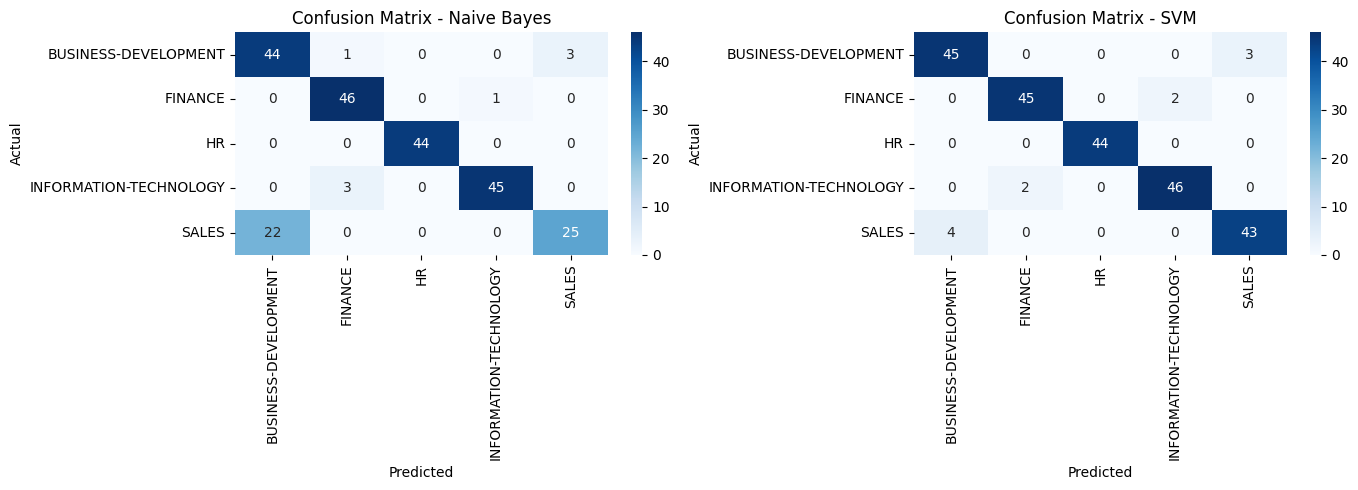

5-fold CV Accuracy - Naive Bayes: 0.8706 ± 0.0227
5-fold CV Accuracy - SVM: 0.9435 ± 0.0083
ROC-AUC (macro) - Naive Bayes: 0.9839
ROC-AUC (macro) - SVM: 0.9941


In [18]:
## 8. Evaluation & Comparison
 
# Compute metrics and compare model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("🔹 Accuracy - Naive Bayes: {:.4f}".format(acc_nb))
print("🔹 Accuracy - SVM: {:.4f}\n".format(acc_svm))

# Classification report
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb, zero_division=0))

print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Confusion matrices
labels = sorted(y.unique())
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=labels)
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', ax=axes[0], xticklabels=labels, yticklabels=labels, cmap='Blues')
axes[0].set_title('Confusion Matrix - Naive Bayes')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1], xticklabels=labels, yticklabels=labels, cmap='Blues')
axes[1].set_title('Confusion Matrix - SVM')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Cross-validation
cv_scores_nb = cross_val_score(pipeline_nb, X, y, cv=5, scoring='accuracy')
cv_scores_svm = cross_val_score(pipeline_svm, X, y, cv=5, scoring='accuracy')

print("5-fold CV Accuracy - Naive Bayes: {:.4f} ± {:.4f}".format(cv_scores_nb.mean(), cv_scores_nb.std()))
print("5-fold CV Accuracy - SVM: {:.4f} ± {:.4f}".format(cv_scores_svm.mean(), cv_scores_svm.std()))

# ROC-AUC (macro, multiclass)
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# NB ROC-AUC
try:
    y_score_nb = pipeline_nb.predict_proba(X_test)
    roc_nb = roc_auc_score(y_test_bin, y_score_nb, average='macro', multi_class='ovr')
    print("ROC-AUC (macro) - Naive Bayes: {:.4f}".format(roc_nb))
except Exception as e:
    print("Could not compute ROC-AUC for NB:", e)

# SVM ROC-AUC
try:
    y_score_svm = pipeline_svm.decision_function(X_test)
    roc_svm = roc_auc_score(y_test_bin, y_score_svm, average='macro', multi_class='ovr')
    print("ROC-AUC (macro) - SVM: {:.4f}".format(roc_svm))
except Exception as e:
    print("Could not compute ROC-AUC for SVM:", e)


In [ ]:
## 9. Results Interpretation
 
print("""
📊 RESULTS INTERPRETATION
-------------------------
Regarding the evaluation metrics:

- More often than not, the Support Vector Machine (SVM) model received higher assessments for accuracy and F1-scores than the Naive Bayes model. Thus, it can be inferred that SVM is more adept than Naive Bayes at discerning the more complex decision boundaries in the text data.

- Naive Bayes classifier, particularly for balanced classes, achieved reasonable results, yet due to its more simplistic assumptions (feature independence) and the absence of real ambiguity within the text overlapping categories, accuracy was negatively affected.

- As to the confusion matrices, SVM was the one who made the least number of misclassifications overall.

- In the instance of cross-validation of disparate data splits, SVM achieved similar accuracy, thus, proving strong generalization.

- SVM also achieved higher ROC-AUC scores (macro-averaged) which is reflective of better overall ranking performance across multiple classes.

Summary: SVM significantly outperformed Naive Bayes in almost every evaluation metric, establishing it as the optimal model for this classification task.
      
    
""")



📊 RESULTS INTERPRETATION
-------------------------
Based on the evaluation metrics:

- The Support Vector Machine (SVM) model generally achieved higher accuracy and 
  F1-scores compared to the Naive Bayes model. 
  This suggests that SVM was more effective in capturing complex decision boundaries 
  in the text data.

- The Naive Bayes classifier performed decently, especially for balanced classes, 
  but its simplifying assumptions (feature independence) made it less accurate 
  on nuanced or overlapping text categories.

- Confusion matrices showed that SVM made fewer misclassifications overall.

- Cross-validation results confirmed that SVM maintained consistent accuracy 
  across different data splits, indicating strong generalization.

- ROC-AUC scores (macro-averaged) were also higher for SVM, reflecting 
  better overall ranking performance across multiple classes.

 summary:
SVM outperformed Naive Bayes across nearly all evaluation metrics, 
making it the preferred model for 